In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl 

from sklearn.impute import SimpleImputer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk import FreqDist

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


In [2]:
reviews_df = pd.read_csv('Womens Clothing E-Commerce Reviews.csv')

reviews_df

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
...,...,...,...,...,...,...,...,...,...,...,...
23481,23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses


In [3]:
reviews_df.describe()

,Unnamed: 0,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,11742.500000,918.118709,43.198544,4.196032,0.822362,2.535936
std,6779.968547,203.298980,12.279544,1.110031,0.382216,5.702202
min,0.000000,0.000000,18.000000,1.000000,0.000000,0.000000
25%,5871.250000,861.000000,34.000000,4.000000,1.000000,0.000000
50%,11742.500000,936.000000,41.000000,5.000000,1.000000,1.000000
75%,17613.750000,1078.000000,52.000000,5.000000,1.000000,3.000000
max,23485.000000,1205.000000,99.000000,5.000000,1.000000,122.000000


In [4]:
# Data Processing and Cleaning
# Checking for missing values
reviews_df.isnull().sum()

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [5]:
# Handling Nan Missing values 
reviews_df['Title'] = reviews_df['Title'].fillna('')
reviews_df['Review Text'] = reviews_df['Review Text'].fillna('')

In [6]:
# Hanling missing null values
impute = SimpleImputer(missing_values=np.nan,strategy='most_frequent')

reviews_df[['Division Name','Department Name','Class Name']] = impute.fit_transform(reviews_df[['Division Name','Department Name', 'Class Name']])

In [7]:
# Generating new variables
# Calculate word count for each review and create a new column
reviews_df["Word Count"] = reviews_df['Review Text'].str.split().apply(len)


In [8]:
# Generating new variables
# Calculate character count for each review and create a new column
reviews_df["Character Count"] = reviews_df['Review Text'].apply(len)


In [9]:
# Creating boolean labels for positive and negative reviews with a threshold set at 3
reviews_df["Label"] = 0
reviews_df.loc[reviews_df.Rating >= 3, ["Label"]] = 1
reviews_df

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Word Count,Character Count,Label
0,0,767,33,,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,8,53,1
1,1,1080,34,,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,62,303,1
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,98,500,1
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,22,124,1
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,36,192,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23481,23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses,28,131,1
23482,23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits,38,223,1
23483,23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses,42,208,1
23484,23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses,86,427,1


In [10]:
# Displaying descriptive statistics (excluding the "count" column)
reviews_df.describe().T.drop("count", axis=1)


,mean,std,min,25%,50%,75%,max
Unnamed: 0,11742.500000,6779.968547,0.0,5871.25,11742.5,17613.75,23485.0
Clothing ID,918.118709,203.298980,0.0,861.00,936.0,1078.00,1205.0
Age,43.198544,12.279544,18.0,34.00,41.0,52.00,99.0
Rating,4.196032,1.110031,1.0,4.00,5.0,5.00,5.0
Recommended IND,0.822362,0.382216,0.0,1.00,1.0,1.00,1.0
Positive Feedback Count,2.535936,5.702202,0.0,0.00,1.0,3.00,122.0
Word Count,58.030869,30.176433,0.0,34.00,57.0,87.00,115.0
Character Count,297.581666,152.572686,0.0,173.00,292.0,451.00,508.0
Label,0.897513,0.303294,0.0,1.00,1.0,1.00,1.0


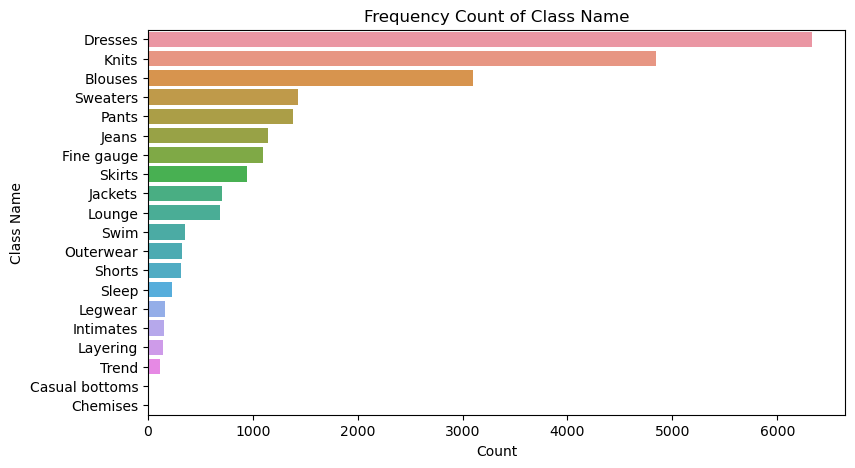

In [11]:
# Visualizing Distribution of Class Name

plt.subplots(figsize=(9, 5))
sns.countplot(y="Class Name", data=reviews_df, order=reviews_df["Class Name"].value_counts().index)
plt.title("Frequency Count of Class Name")
plt.xlabel("Count")
plt.show()


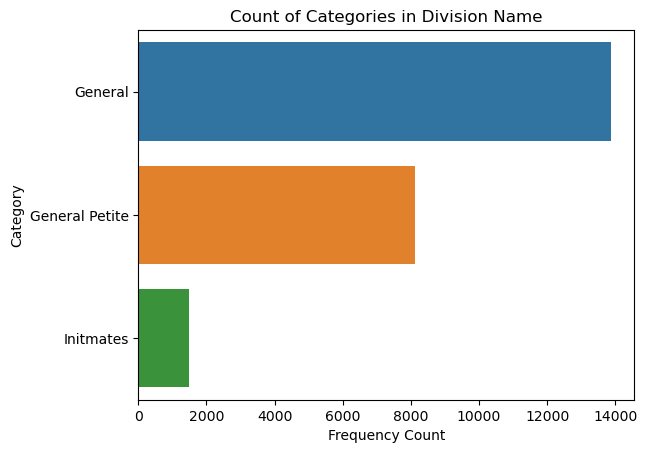

In [12]:
# Visualizing Distribution of Division Name

# Plotting counts for each category in the "Division Name" column
sns.countplot(y="Division Name", data=reviews_df, order=reviews_df["Division Name"].value_counts().index)
plt.title("Count of Categories in Division Name")
plt.xlabel("Frequency Count")
plt.ylabel("Category")
plt.show()


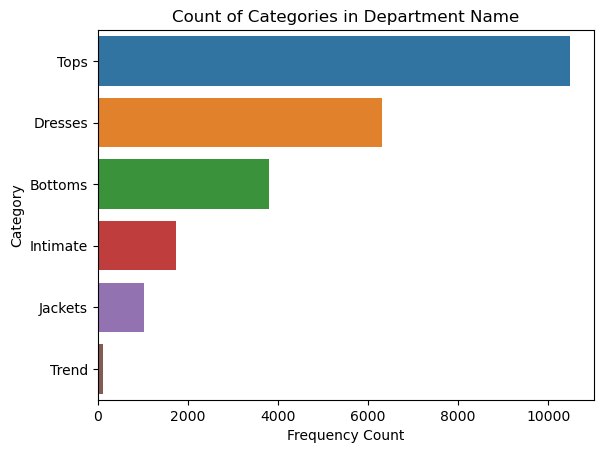

In [13]:
# Visualizing Distribution of Department Name

# Plotting counts for each category in the "Department Name" column
sns.countplot(y="Department Name", data=reviews_df, order=reviews_df["Department Name"].value_counts().index)
plt.title("Count of Categories in Department Name")
plt.xlabel("Frequency Count")
plt.ylabel("Category")
plt.show()


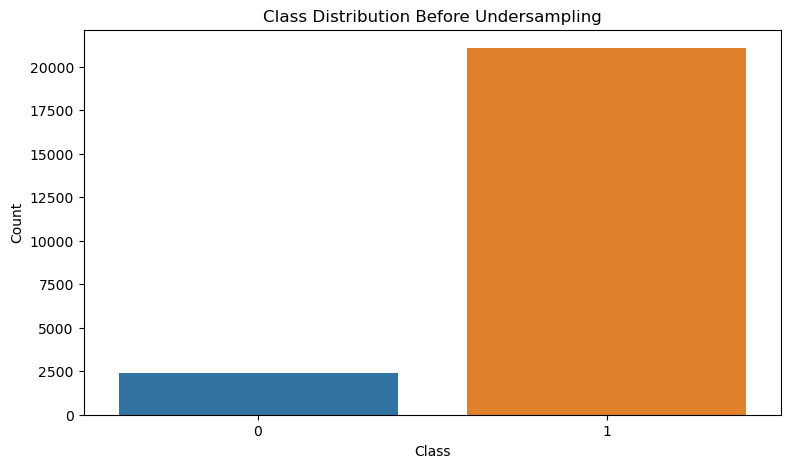

In [14]:
# Checking Class Distribution Before Undersampling

plt.subplots(figsize=(9, 5))
sns.countplot(x="Label", data=reviews_df)
plt.title("Class Distribution Before Undersampling")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()


In [15]:
# Separate majority and minority classes
positive_reviews = reviews_df[reviews_df['Label'] == 1]
negative_reviews = reviews_df[reviews_df['Label'] == 0]

In [16]:
# Undersample majority class
majority_downsampled = resample(negative_reviews, replace=True, n_samples=len(positive_reviews), random_state=42)

In [17]:
# Combine minority class with undersampled majority class
undersampled_df = pd.concat([majority_downsampled, positive_reviews])


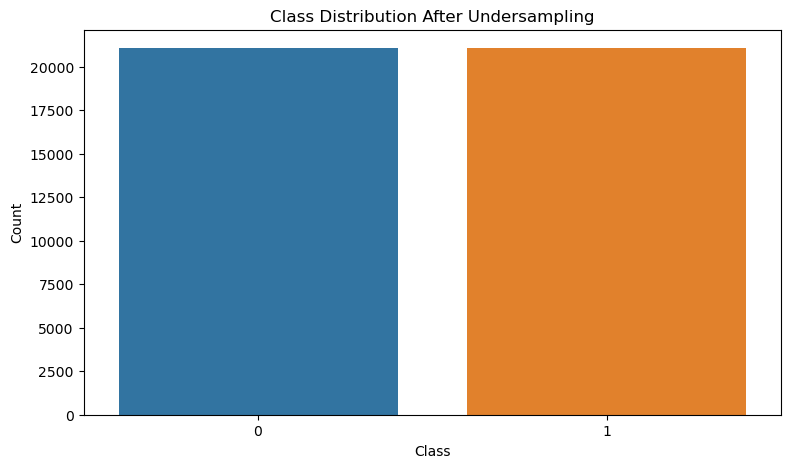

In [18]:
# Display class distribution after undersampling
plt.figure(figsize=(9, 5))
sns.countplot(x="Label", data=undersampled_df)
plt.title("Class Distribution After Undersampling")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

In [19]:
# Splitting the dataset into features (X) and labels (y)
X = undersampled_df['Review Text'] 
y = undersampled_df['Label']

In [20]:
# Displaying the first few rows of X and y
print("Features (X):")
print(X.head())

Features (X):
8721     I was drawn to this top because of the interes...
12606    The pants are pretty and run true to size, but...
11021    Where o where did the old pilcro ankle stet go...
10704    I am obsessed with denim and have two other pa...
16188    I was really disappointed in the shirt. the bl...
Name: Review Text, dtype: object


In [21]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
# Create TF-IDF vectors for text data
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [23]:
# Training a Naive Bayes classifier
classifier = MultinomialNB()
classifier.fit(X_train_tfidf, y_train)

MultinomialNB()

In [24]:
# Make predictions on the test set
y_pred = classifier.predict(X_test_tfidf)

In [25]:
# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.89

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.90      0.89      4256
           1       0.90      0.87      0.88      4176

    accuracy                           0.89      8432
   macro avg       0.89      0.89      0.89      8432
weighted avg       0.89      0.89      0.89      8432


Confusion Matrix:
[[3851  405]
 [ 552 3624]]


In [26]:
stop_words = set(STOPWORDS)
size = (10,7)

def cloud(text, title, stopwords=stop_words, size=size):

    # Setting figure parameters
    mpl.rcParams['figure.figsize']=(10.0,10.0)
    mpl.rcParams['font.size']=12
    mpl.rcParams['savefig.dpi']=100
    mpl.rcParams['figure.subplot.bottom']=.1 
    
    # Processing Text
    wordcloud = WordCloud(width=1600, height=800,
                          background_color='black',
                          stopwords=stopwords,
                         ).generate(str(text))
    
    # Output Visualization
    fig = plt.figure(figsize=size, dpi=80, facecolor='k',edgecolor='k')
    plt.imshow(wordcloud,interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=50,color='y')
    plt.tight_layout(pad=0)
    plt.show()
    
# Frequency Calculation [One-Gram]
def wordfreqviz(text, x):
    word_dist = nltk.FreqDist(text)
    top_N = x
    rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency']).set_index('Word')
    matplotlib.style.use('ggplot')
    rslt.plot.bar(rot=0)

def wordfreq(text, x):
    word_dist = nltk.FreqDist(text)
    top_N = x
    rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency']).set_index('Word')
    return rslt

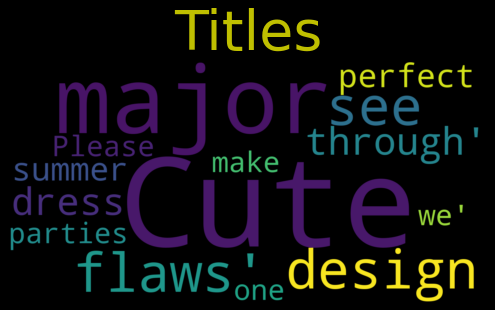

In [27]:
# Generating a Word Cloud for Titles
cloud(text= reviews_df.Title.astype(str).values,
      title="Titles",
      stopwords= stop_words,
      size = (6,6))

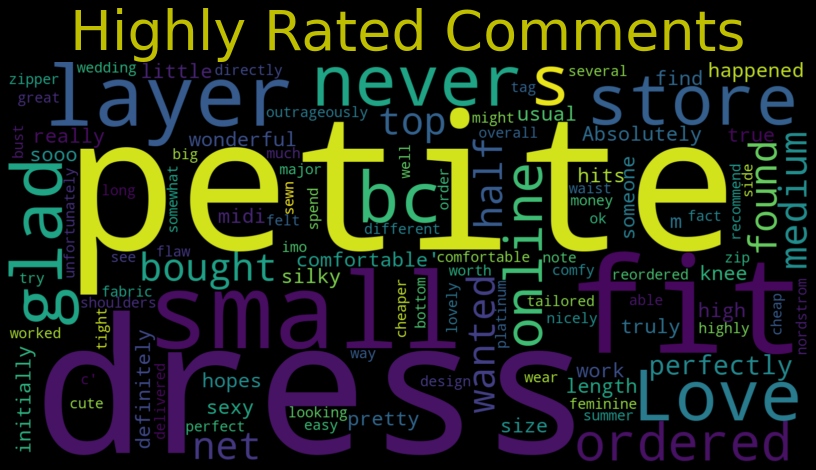

In [28]:
# Words used in comments with high ratings

title ="Highly Rated Comments"
temp = reviews_df['Review Text'][reviews_df.Rating.astype(int) >= 3]
cloud(text= temp.values, title=title,stopwords= stop_words)

In [29]:
# Tokenize the entire text data
all_reviews_text = ' '.join(undersampled_df['Review Text'].astype(str))
all_tokens = word_tokenize(all_reviews_text)

In [30]:
# Create a frequency distribution of words
freq_dist = FreqDist(all_tokens)

In [31]:
# Display the most common words
print("Most Common Words:")
print(freq_dist.most_common(20))

Most Common Words:
[('.', 164438), ('the', 144895), ('i', 101519), ('it', 90102), (',', 89160), ('and', 85400), ('a', 72595), ('is', 53345), ('to', 44303), ('this', 40749), ('in', 37384), ('was', 32324), ('but', 31180), ('on', 29273), ('of', 26083), ('for', 23454), ('not', 21532), ('so', 21485), ('!', 21018), ('dress', 19246)]


In [32]:
# Tabulate the frequency distribution
print("\nWord Frequency Table:")
print(freq_dist.tabulate(10))


Word Frequency Table:
     .    the      i     it      ,    and      a     is     to   this 
164438 144895 101519  90102  89160  85400  72595  53345  44303  40749 
None


In [33]:
# Text preprocessing
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

In [34]:
def preprocess_text(text):
    # Tokenize words
    words = word_tokenize(text)
    
    # Remove stopwords and non-alphabetic words, and perform stemming
    words = [stemmer.stem(word.lower()) for word in words if word.isalpha() and word.lower() not in stop_words]
    
    # Join the words back into a string
    processed_text = ' '.join(words)
    
    return processed_text


In [35]:
# Apply preprocessing to 'Review Text' column
reviews_df['Processed Text'] = reviews_df['Review Text'].apply(preprocess_text)

In [36]:
# Initialize SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()


In [37]:
# Apply sentiment analysis to 'Processed Text' column
reviews_df['Sentiment Score'] = reviews_df['Processed Text'].apply(lambda x: sia.polarity_scores(x)['compound'])

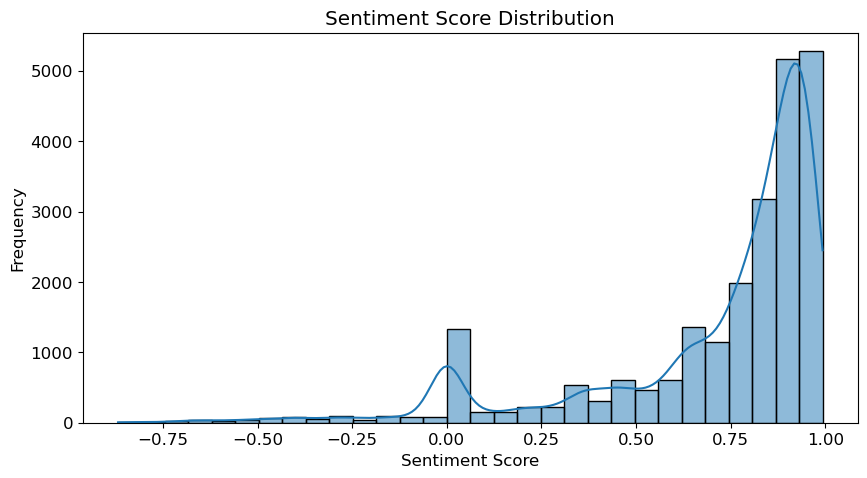

In [38]:
# Visualize sentiment distribution
plt.figure(figsize=(10, 5))
sns.histplot(reviews_df['Sentiment Score'], bins=30, kde=True)
plt.title('Sentiment Score Distribution')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

In [39]:
# Binarize sentiment score (positive or negative)
reviews_df['Sentiment Label'] = reviews_df['Sentiment Score'].apply(lambda x: 1 if x >= 0 else 0)


In [40]:
# Display the processed dataframe
reviews_df[['Review Text', 'Processed Text', 'Sentiment Score', 'Sentiment Label']]

,Review Text,Processed Text,Sentiment Score,Sentiment Label
0,Absolutely wonderful - silky and sexy and comf...,absolut wonder silki sexi comfort,0.3612,1
1,Love this dress! it's sooo pretty. i happene...,love dress sooo pretti happen find store glad ...,0.9349,1
2,I had such high hopes for this dress and reall...,high hope dress realli want work initi order p...,0.8957,1
3,"I love, love, love this jumpsuit. it's fun, fl...",love love love jumpsuit fun flirti fabul everi...,0.9753,1
4,This shirt is very flattering to all due to th...,shirt flatter due adjust front tie perfect len...,0.8860,1
...,...,...,...,...
23481,I was very happy to snag this dress at such a ...,happi snag dress great price easi slip flatter...,0.5267,1
23482,"It reminds me of maternity clothes. soft, stre...",remind matern cloth soft stretchi shini materi...,0.6705,1
23483,"This fit well, but the top was very see throug...",fit well top see never would work glad abl tri...,0.7918,1
23484,I bought this dress for a wedding i have this ...,bought dress wed summer cute unfortun fit perf...,0.9371,1
